# Lineær regresjon - én variabel

Matematisk, kan vi beskrive datasettet vårt på følgende måte

$$
\begin{align*}
y_0&=\beta_0+\beta_1x_0+\epsilon_0\\
y_1&=\beta_0+\beta_1x_1+\epsilon_1\\
y_2&=\beta_0+\beta_1x_2+\epsilon_2\\
\dots & \dots \\
y_{n-1}&=\beta_0+\beta_1x_{n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

Når vi kun har én variabel får vi en matrise på formen

$$
\boldsymbol{X}=
\begin{bmatrix} 
1& x_{0} \\
1& x_{1} \\
1& x_{2} \\                      
\dots& \dots \\
1& x_{n-1} \\
\end{bmatrix}
$$

Med $n$ antall observasjoner

Målet vårt nå er å finne $\boldsymbol{\beta}$-ene våre 

$$
\boldsymbol{\beta} = [\beta_0, \beta_1]^T
$$

For å tilpasse oss "target" $\boldsymbol{y}$ 

$$
\boldsymbol{y} = [y_0,y_1, y_2,\dots, y_{n-1}]^T,
$$

Dette skrive på følgende måte

$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\epsilon}.
$$

Vår målfunksjon i denne sammenhengen vil være OLS og den kan beskrives på følgende måte

$$
\boldsymbol{\beta} =\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

In [2]:
%matplotlib inline

# Importerer forskjellige pakker
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
class my_ols():
    def __init__(self):
        self.beta = None
    
    def fit(self,x,y,size):
        X = np.c_[np.ones(size),x]
        self.beta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        print("Model successfully trained")
    
    def predict(self,x):
        y_hat = self.beta[0]+self.beta[1] * x
        return y_hat    

In [4]:
def OLS(x,y,size):
    x_test=np.c_[np.ones(size),x]
    beta=np.linalg.inv(x_test.T.dot(x_test)).dot(x_test.T).dot(y)
    xnew = np.linspace(0,1,size)
    y_test=beta[0]+beta[1]*xnew
    return xnew, y_test

In [9]:
# Lager noen syntetiske data 
x = np.random.rand(250,1)
y = 4*x+np.random.randn(250,1)

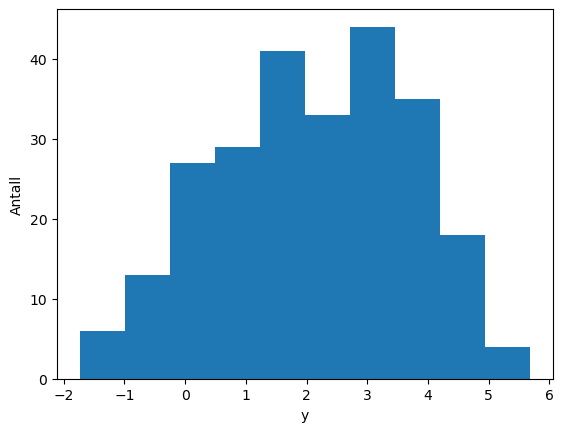

In [10]:
plt.hist(y)
plt.ylabel(r'Antall')
plt.xlabel(r'y')
plt.show()

In [11]:
model = my_ols()

In [12]:
model.fit(x,y,len(x))

Model successfully trained


Generer data for å tegne linjen som tilsvarer modellen vår

In [16]:
x_new = np.linspace(0,1,10)

In [17]:
y_hat_new_ols = model.predict(x_new)

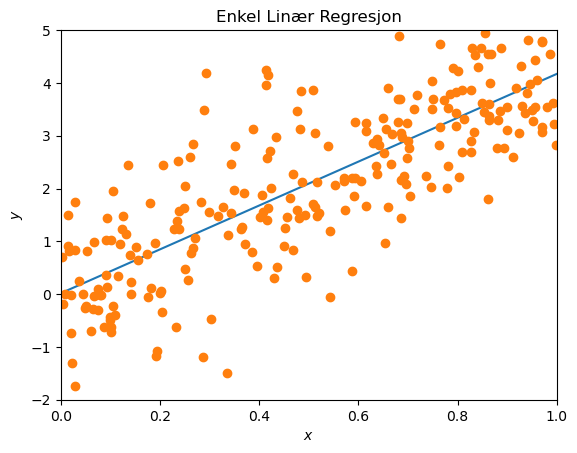

In [18]:
#x_ols, y_ols = OLS(x,y, len(x))

plt.plot(x_new, y_hat_new_ols, "C0-")
plt.plot(x, y ,'C1o')
plt.axis([0,1.0,0, 5.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.ylim(-2,5)
plt.title(r'Enkel Linær Regresjon')
plt.show()

Det samme ved bruk av SciKit-Learn

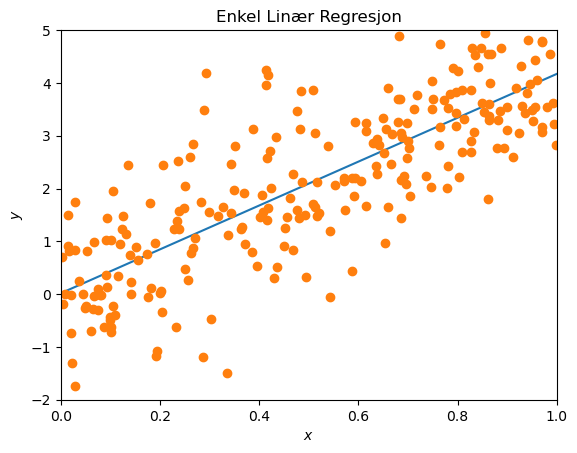

In [19]:
linreg = LinearRegression()
linreg.fit(x,y)
#y_hat_new_sk = linreg.predict(x_new)
y_hat_new_sk = linreg.predict(np.expand_dims(x_new,1))

plt.plot(x_new, y_hat_new_sk, "C0-")
plt.plot(x, y ,'C1o')
plt.axis([0,1.0,0, 5.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.ylim(-2,5)
plt.title(r'Enkel Linær Regresjon')
plt.show()

In [20]:
print("beta_0 = ", linreg.intercept_[0])
print("beta_1 = ", linreg.coef_[0][0])

beta_0 =  0.016714073622483117
beta_1 =  4.154140312068191


$\boldsymbol{\beta}$-ene er nå vår modell og vi kan bruke de til å gjøre prediksjoner på nye data. 

La oss f.eks prøve med x = 0.9

In [21]:
x_new_2 = 0.9

In [25]:
y_hat_new_2 = linreg.intercept_[0] + linreg.coef_[0][0]*x_new_2
y_hat_new_2

3.755440354483855

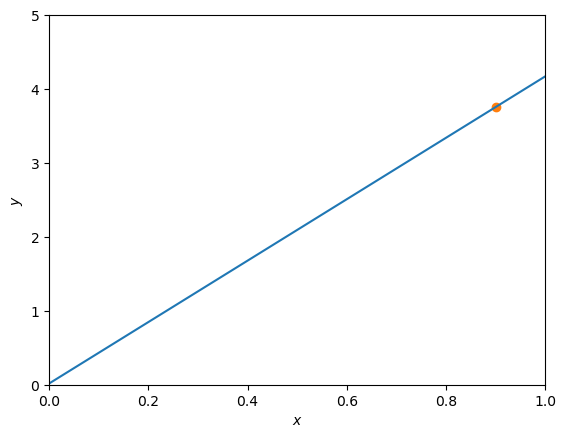

In [26]:
plt.plot(x_new, y_hat_new_sk, "C0-")
plt.scatter(x_new_2,y_hat_new_2, color= "C1")
plt.axis([0,1.0,0, 5.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

Vi kan også bruke modellen vår (enten den vi har bygget fra bunnen eller SciKit-Learn modellen

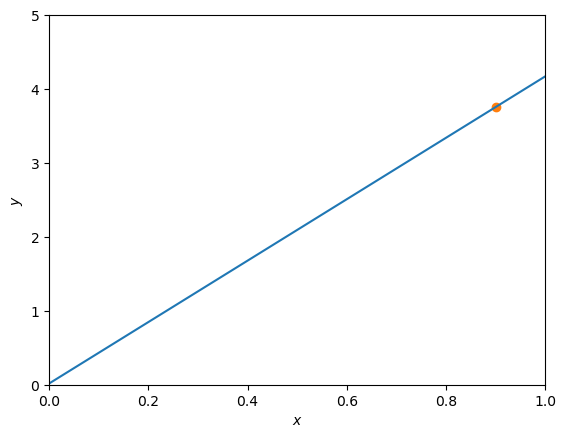

In [27]:
plt.plot(x_new, y_hat_new_sk, "C0-")
plt.scatter(x_new_2,linreg.predict(np.array([[x_new_2]])), color= "C1")
plt.axis([0,1.0,0, 5.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()